<a href="https://colab.research.google.com/github/vsr87/Projeto-Analise-de-Dados/blob/main/Sidequest_Dados_PTC_vsr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SIDEQUEST**

## **Tratamento da base**

- Essa parte foi feita no desafio geral de Dados!

## **Análises propostas**

### **1. Distribuição de Aprovação**

In [ ]:
# Importa as bibliotecas que vão ser utilizadas
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Importa a base armezanando na variável base
base = pd.read_csv('/content/Base_atualizada.csv')

In [ ]:
# Armazena o quantitativo de valores "Não" e "Sim" no count
count = base['aprovado'].value_counts()

# Printa os resultados
print("Distribuição da aprovação:\n")
print(count)

Distribuição da aprovação:

aprovado
Não    82
Sim    18
Name: count, dtype: int64


In [ ]:
# Calcula os valores percentuais de "Não" e "Sim" da coluna "aprovado"
percent = base['aprovado'].value_counts(normalize=True) * 100

# Printa os resultados
print("Percentuais:\n")
print(percent.round(2))

Percentuais:

aprovado
Não    82.0
Sim    18.0
Name: proportion, dtype: float64


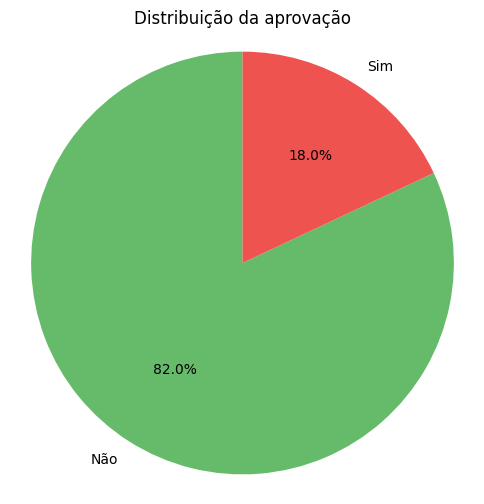

In [ ]:
# Criar gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=90, colors=['#66bb6a', '#ef5350'])
plt.title('Distribuição da aprovação')
plt.axis('equal')
plt.show()

- **INSIGHT: nota-se que o percentual de aprovação é baixo, o que implica em um ensino desqualificado, baixa frequência de alunos e/ou alunos desmotivados nos estudos**

---
### **2. Distribuição por sexo**

In [ ]:
# Armazena o quantitativo de valores Maculino e Feminino
count_sexo = base['sexo'].value_counts()

# Printa os valores
print("Distribuição por sexo:\n")
print(count_sexo)

Distribuição por sexo:

sexo
Feminino     53
Masculino    47
Name: count, dtype: int64


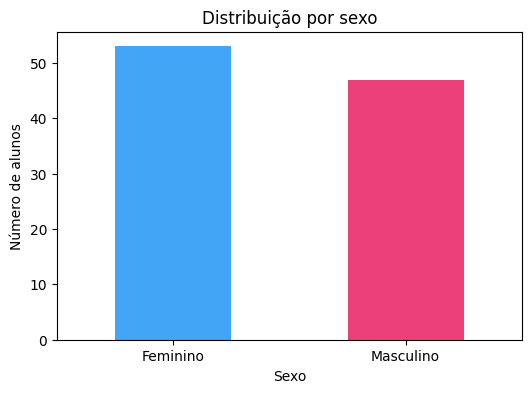

In [ ]:
# Gráfico de barras
plt.figure(figsize=(6, 4))
count_sexo.plot(kind='bar', color=['#42a5f5', '#ec407a'])
plt.title('Distribuição por sexo')
plt.ylabel('Número de alunos')
plt.xlabel('Sexo')
plt.xticks(rotation=0)
plt.show()

**INSIGHT: nota-se que a escola é bem diversificada, podendo gerar um ambiente inovador e sendo interessante para a socialização dos alunos e imagem da escola.**

---
### **3. Ranking das melhores médias**

In [ ]:
# Ordena os alunos pela média de modo decrescente para pegar os 5 primeiros
ordem_media = base.sort_values(by='media', ascending=False).head(5)

# Printa os resultados
print("Os 5 alunos com as melhores médias:\n")
print(ordem_media[['nome', 'media']])

Os 5 alunos com as melhores médias:

               nome  media
18  Mariana Barbosa   8.60
14  Miguel Teixeira   8.55
40   Fernando Pinto   8.44
62   Renan Nogueira   8.16
70   Pietro Almeida   8.14


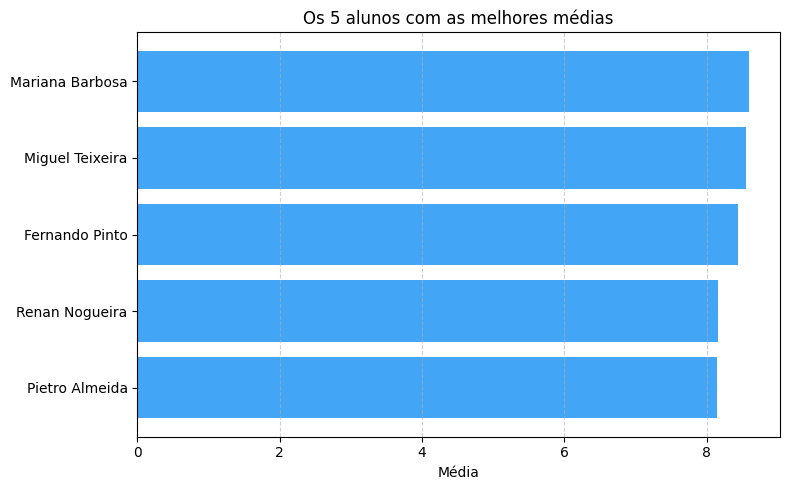

In [ ]:
# Gráfico de barras horizontais
plt.figure(figsize=(8, 5))
plt.barh(ordem_media['nome'], ordem_media['media'], color='#42a5f5')
plt.xlabel('Média')
plt.title('Os 5 alunos com as melhores médias')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

---
### **4. Ranking de frequência**

In [ ]:
# Ordena os alunos pela frequencia de modo decrescente pra pegar os 5 primeiros
ordem_frequencia = base.sort_values(by='frequencia', ascending=False).head(5)

# Printa os resultados
print("Os 5 alunos mais assíduos:\n")
print(ordem_frequencia[['nome', 'frequencia']])

Os 5 alunos mais assíduos:

                   nome  frequencia
97      Clarice da Mota        99.4
33         Renan Novaes        99.1
74    Maria Luiza Silva        98.8
65          Laís Farias        98.5
76  Ana Carolina Farias        97.9


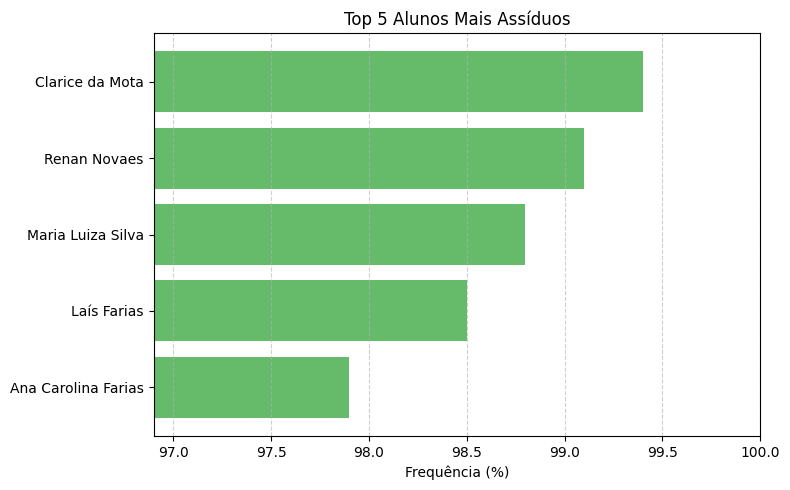

In [ ]:
# Determina o menor valor e ajusta o limite inferior do gráfico
min_freq = ordem_frequencia['frequencia'].min()
limite_inferior = min_freq - 1 if min_freq > 1 else 0  # Deixa uma folga visual

# Gráfico de barras horizontais
plt.figure(figsize=(8, 5))
plt.barh(ordem_frequencia['nome'], ordem_frequencia['frequencia'], color='#66bb6a')
plt.xlabel('Frequência (%)')
plt.title('Top 5 Alunos Mais Assíduos')
plt.xlim(limite_inferior, 100)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**INSIGHT: nota-se que os alunos mais assíduos não são os alunos com as melhores médias, o que reforça as três hipóteses que citei na primeira análise.**

---
## **Análises extras**

### **Quantitativo de alunos por série**

In [ ]:
# Conta o número de alunos por série
count_serie = base['serie'].value_counts().sort_index()

# Printa os resultados
print("Quantidade de alunos por série:")
print(count_serie)


Quantidade de alunos por série:
serie
1º Ano     5
2º Ano    11
3º Ano    18
4º Ano     9
5º Ano    10
6º Ano    16
7º Ano     6
8º Ano     8
9º Ano    17
Name: count, dtype: int64


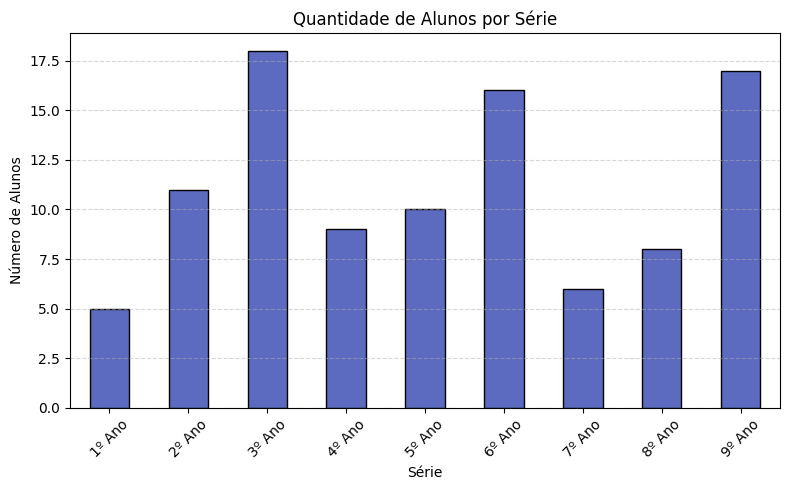

In [ ]:
# Gráfico de barras
plt.figure(figsize=(8, 5))
count_serie.plot(kind='bar', color='#5c6bc0', edgecolor='black')
plt.title('Quantidade de Alunos por Série')
plt.xlabel('Série')
plt.ylabel('Número de Alunos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Insights:**

- 3º, 6º e 9º ano são as séries com mais alunos, enquanto o 1º e 7º ano são as que têm menos alunos, o que pode indicar menor entrada de novos alunos no caso do 1º e evasão ou reprovação no 7º ano.

- A distribuição entre séries é equilibrada de certo modo, mas há picos em alguns anos, o que pode influenciar planejamento de turmas, professores e materiais escolares.

Para a escola, é importante verificar exatamente o porquê de certas séries têm menos alunos e daí avaliar a necessidade de reforço pedagógico ou campanhas de engajamento específicas por série.



---
### **Quantitativo de alunos por idade**

In [ ]:
# Conta quantos alunos têm cada idade
count_idade = base['idade'].value_counts().sort_index()

# Printa os resultados
print("Quantidade de alunos por idade:")
print(count_idade)

Quantidade de alunos por idade:
idade
5      2
6      8
7     10
8     10
9     12
10    14
11    11
12    10
13    10
14     8
15     5
Name: count, dtype: int64


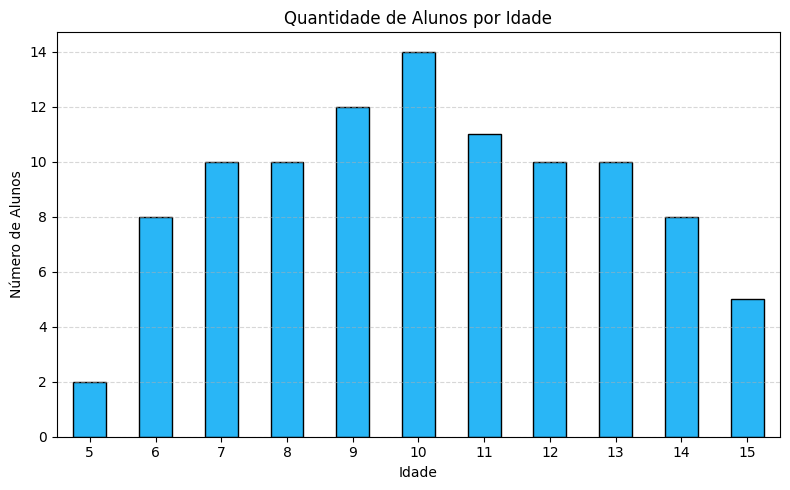

In [ ]:
# Gráfico de barras
plt.figure(figsize=(8, 5))
count_idade.plot(kind='bar', color='#29b6f6', edgecolor='black')
plt.title('Quantidade de Alunos por Idade')
plt.xlabel('Idade')
plt.ylabel('Número de Alunos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Insights:**

- A faixa etária mais comum está entre 9 e 12 anos, com um pico aos 10 anos.
- Idades como 5, 6 e 15 anos têm poucos alunos, o que é esperado, já que 5/6 anos geralmente ainda estão no infantil ou recém entraram no fundamental.
- 15 anos normalmente já estão no ensino médio ou repetiram algum ano.
- A presença de alunos com idades mais altas (14/15 anos) pode indicar retenção/reprovação.


Para a escola, é importante monitorar os alunos de 14/15 anos, já que eles podem estar fora da idade-série ideal, e isso pode impactar sua motivação e desempenho. Assim, pode usar esse dado para ajustar práticas pedagógicas por faixa etária, como metodologias ativas para alunos mais velhos.

---
### **Análise da relação idade x série**

<ipython-input-16-8663fb4448ae>:8: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=base, x='serie', y='idade', order=ordem_series, jitter=True, alpha=0.6, color='#42a5f5', edgecolor='gray', linewidth=0.5)


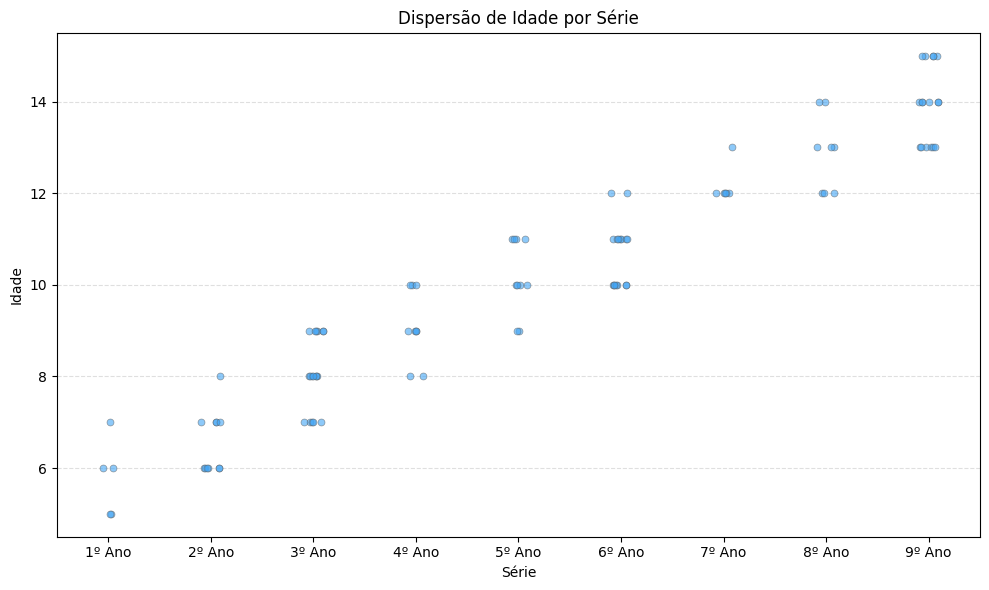

In [ ]:
import seaborn as sns

# Ordena as séries (para manter a sequência lógica no eixo X)
ordem_series = sorted(base['serie'].unique(), key=lambda x: int(x.split('º')[0]))  # Ex: '6ºAno' → 6

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.stripplot(data=base, x='serie', y='idade', order=ordem_series, jitter=True, alpha=0.6, color='#42a5f5', edgecolor='gray', linewidth=0.5)

plt.title('Dispersão de Idade por Série')
plt.xlabel('Série')
plt.ylabel('Idade')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

**INSIGHTS:**

- A maioria dos alunos segue uma progressão regular de idade em relação à série.
- Porém em praticamente todas as séries têm alunos acima da idade esperada, principalmente no 9º ano, o que indica evasão, repetência ou entrada tardia no sistema escolar.

Para a escola, é importante criar um indicador de distorção idade-série para acompanhamento, oferecer programas de aceleração para alunos defasados dependendo da faixa etária e capacidade, desenvolver ações de apoio pedagógico personalizado e acompanhamento socioemocional para os alunos fora da faixa ideal e analisar se a distorção está concentrada em determinadas turmas, turnos ou professores.

---
### **Análise da relação aprovados x serie**

In [ ]:
# Calcula percentual de aprovação por série
percentual_aprovados = base[base['aprovado'] == 'Sim'].groupby('serie').size() / base.groupby('serie').size() * 100

# Ordena pelas séries
percentual_aprovados = percentual_aprovados.sort_index()

# Printa os resultados
print(percentual_aprovados)

serie
1º Ano    60.000000
2º Ano     9.090909
3º Ano    11.111111
4º Ano    33.333333
5º Ano    10.000000
6º Ano    25.000000
7º Ano    33.333333
8º Ano          NaN
9º Ano    11.764706
dtype: float64


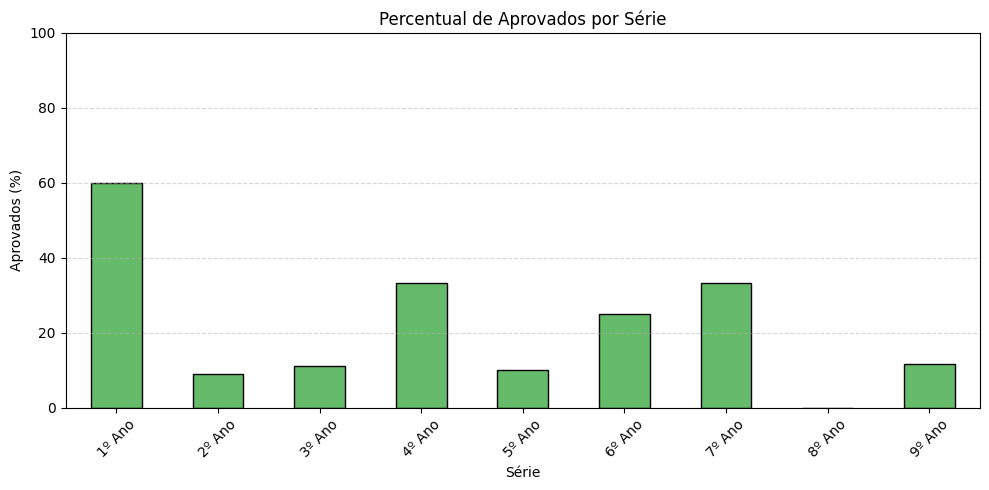

In [ ]:
# Plotar gráfico de barras
plt.figure(figsize=(10, 5))
percentual_aprovados.plot(kind='bar', color='#66bb6a', edgecolor='black')
plt.title('Percentual de Aprovados por Série')
plt.xlabel('Série')
plt.ylabel('Aprovados (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**INSIGHTS:**

- Apenas o 1º Ano tem um resultado razoável (60% de aprovação).
- Séries como 2º, 3º, 5º e 9º Ano apresentam menos de 15% de aprovação, o que é extremamente baixo.
- O 8º Ano aparece com nenhum aluno aprovado.

Para a escola, é importante revisar práticas pedagógicas nas séries com baixa aprovação e implementar reforço escolar, tutoria ou grupos de estudo.

---
### **Análise dos fatores nota e frequência como determinante na reprovação**

In [ ]:
base_tmp = base.copy()
# Substituir vírgula por ponto e converter para float (sem alterar o original)
base_tmp['nota_matematica_num'] = base_tmp['nota_matematica'].astype(str).str.replace(',', '.').astype(float)
base_tmp['nota_portugues_num'] = base_tmp['nota_portugues'].astype(str).str.replace(',', '.').astype(float)
base_tmp['frequencia_num'] = base_tmp['frequencia'].astype(str).str.replace(',', '.').astype(float)

# Calcular médias por situação (aprovado ou não)
comparativo = base_tmp.groupby('aprovado')[['nota_matematica_num', 'nota_portugues_num', 'frequencia_num']].mean()

# Exibir para visualização
print(comparativo)

          nota_matematica_num  nota_portugues_num  frequencia_num
aprovado                                                         
Não                  4.282927            4.020732       77.276829
Sim                  7.988889            7.316667       82.094444


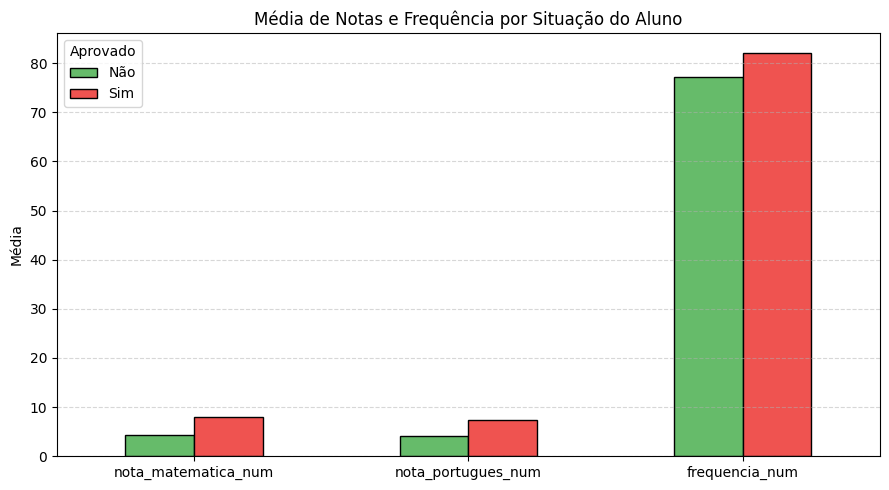

In [ ]:
# Gráfico comparativo
comparativo.T.plot(kind='bar', figsize=(9, 5), color=['#66bb6a', '#ef5350'], edgecolor='black')

plt.title('Média de Notas e Frequência por Situação do Aluno')
plt.ylabel('Média')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Aprovado')
plt.tight_layout()
plt.show()

**INSIGHT:**

- Nota-se que o desempenho acadêmico (notas) tem um peso maior na reprovação do que a frequência, já que as diferenças nas médias entre aprovados e não aprovados são maiores (inclusive as notas em matematica tem peso maior na reprovação pela diferença).
- A diferença de frequência entre aprovados e reprovados é de cerca de 5 pontos percentuais, o que não é tão expressivo quanto a diferença nas notas (mais de 3 pontos)